<a href="https://colab.research.google.com/github/tallninja/ml-projects/blob/master/Tensorflow_Functional_API_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Using tensorflow version 2

try:
  %tensorflow_version 2.x
except Exception:
  pass

# importing modules and libraries
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

## Sequential API

using the sequential class to build amodel

In [3]:
def build_model_with_sequential():
  model = tf.keras.Sequential(
      [
       tf.keras.layers.Flatten(input_shape=(28, 28)),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(10, activation='softmax')
      ]
  )

  return model

## Functional API

Using the functional syntax to build a model

In [4]:
def build_model_with_functional():
  input_layer = tf.keras.layers.Input(shape=(28, 28))
  flatten_layer = tf.keras.layers.Flatten()(input_layer)
  first_layer = tf.keras.layers.Dense(128, activation='relu')(flatten_layer)
  output_layer = tf.keras.layers.Dense(10, activation='softmax')(first_layer)

  model = Model(inputs=input_layer, outputs=output_layer)

  return model

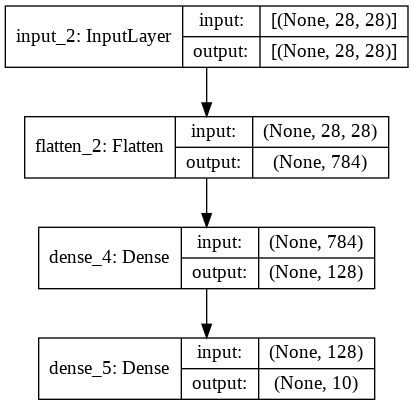

In [7]:
# Functional Model

model = build_model_with_functional()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

training_images = training_images / 255
testing_images = testing_images / 255

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(training_images, training_labels, epochs=5)
model.evaluate(testing_images, testing_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2821 - accuracy: 0.8952
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9004
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2580 - accuracy: 0.9047
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2472 - accuracy: 0.9075
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8805


[0.3312942087650299, 0.8805000185966492]